In [59]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from utils import *
%load_ext autoreload
%autoreload 2
import random
with open('TSPD.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile, delimiter=';'))
    for item in range(len(data)):
        i = data[item]
        data[item] = [int(i[0]),int(i[1]),int(i[2])]
data = data

# data = np.array([(0, 0), (1, 2), (2, 4), (3, 1), (7, 3), (2,5), (4,4)]) * 10
NR_NODES = len(data)
HALF_NODES = int(len(data)/2)
print(data)
print(NR_NODES)

if len(data[0])==2:
    is_cost = False
else:
    is_cost = True
print("is_cost",is_cost)
matrix, cost_list =  get_dist_matrix_and_cost(data, cost=is_cost)
matrix



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[2907, 1115, 464], [3433, 183, 932], [2237, 74, 130], [91, 583, 503], [3053, 1867, 496], [2698, 436, 283], [1940, 1520, 735], [1251, 807, 893], [1415, 700, 128], [472, 498, 979], [1537, 1883, 759], [2839, 370, 754], [1083, 1307, 27], [702, 196, 680], [1393, 917, 523], [2901, 1231, 978], [1650, 1001, 65], [2111, 323, 785], [1596, 1302, 48], [2260, 1365, 382], [1427, 425, 871], [603, 513, 421], [1967, 1119, 827], [3781, 1575, 818], [3506, 628, 263], [3877, 1877, 102], [3019, 651, 468], [3070, 845, 868], [415, 1327, 577], [1782, 1395, 397], [1470, 76, 881], [3361, 93, 210], [1275, 65, 513], [1879, 1535, 347], [3019, 396, 142], [111, 1959, 973], [3818, 1948, 163], [3441, 1571, 322], [3882, 128, 122], [18, 481, 996], [1610, 511, 488], [3355, 1511, 863], [3613, 56, 599], [3408, 1072, 594], [520, 950, 44], [48, 791, 582], [2654, 1329, 755], [1047, 1727, 522], [1865, 88, 822], [3670, 1131, 786], [3577, 937

array([[          inf, 1070.18689956, 1237.97455547, ...,  685.45532312,
         444.81906434,  821.77004083],
       [1070.18689956,           inf, 1200.95670197, ...,  410.85885654,
        1378.8937595 , 1790.59599017],
       [1237.97455547, 1200.95670197,           inf, ...,  985.0989798 ,
        1114.56942359, 1358.91758396],
       ...,
       [ 685.45532312,  410.85885654,  985.0989798 , ...,           inf,
         968.14306794, 1379.73946816],
       [ 444.81906434, 1378.8937595 , 1114.56942359, ...,  968.14306794,
                  inf,  413.1755075 ],
       [ 821.77004083, 1790.59599017, 1358.91758396, ..., 1379.73946816,
         413.1755075 ,           inf]])

In [60]:
def count_cost_diff_cycle(edge, new_n, dist_m, cost_list):
    start_n = edge[0]
    end_n = edge[1]
    # cost(start-end) + cost(start, new) + cost(end,new) + cost(new)print(distance_matrix[:10][:10])
    cost_diff = - dist_m[start_n][ end_n] + dist_m[start_n][ new_n] + dist_m[new_n][end_n] +cost_list[new_n]
    # assert cost_diff>0, f'{cost_diff, - dist_m[start_n][ end_n], dist_m[start_n][ new_n], dist_m[new_n][end_n]}' #
    return cost_diff

def create_regret_matrix(non_visited, cur_tour, dist_m, cost_list): #cur_tour = edges
    reg_matrix = np.zeros((len(dist_m),len(cur_tour)))
    for new_node in non_visited:
        for i,edge in enumerate(cur_tour):
            reg_matrix[new_node][i]=count_cost_diff_cycle(edge, new_node, dist_m, cost_list)

    return reg_matrix

def return_biggest_regret(matrix):
    min_values_for_rows = np.min(matrix, axis=1)
    # print("min_values_for_rows",min_values_for_rows)
    rescue_node = np.argmax(min_values_for_rows, axis=0) #najlepiej ratować 4 index
    # print("City with bigest regret",rescue_node)
    rescueing_node = np.argmin(matrix[rescue_node])# def return_max_from_min_rows_regret(matrix):
    # print("Rescueing edge index to modify: ",rescueing_node)
    return rescue_node, rescueing_node




In [61]:
from copy import deepcopy
a = np.array([1,2,3,4])
b = np.array([0,0,5,5])
np.minimum(a,b)



array([0, 0, 3, 4])

[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [(2, 1), (1, 2)]


/home/zuzabu/projects/tsp/utils.py:117: RuntimeWarning: invalid value encountered in add
  cost_diff = - dist_m[[start_n, end_n]] + dist_m[[start_n, new_n]] + dist_m[[new_n, end_n]] + cost_list[ new_n]


---- [[4792.21568865 3789.16964021           nan 6980.42213672 5474.45221218
  4420.38376503 5687.75798582 5901.44477296 5712.38464484 6591.16313613
  6229.51039877 4264.85587152 6255.20765295 6334.90757905 5807.45506043
  4901.36768007 5610.91753403 4944.8972748  5813.28387209 5356.2287727
  5636.20288309 6463.70981228 5404.78370526 5214.27829577 4228.21476601
  5531.03806319 4328.38112659 4480.25390273 6867.9190395  5720.48248413
  5564.98981699           inf 5760.10131493 5741.68708594 4130.83024538
  7421.50676501 5584.3777454  5154.07690842 4196.08770434 7039.35438544
  5474.11478156 5091.92609781 3928.61519034 4654.04094666 6641.35843291
  7059.64419654 5097.83229207 6506.67742517 5169.92175953 4756.93002431
  4545.11487317 6958.91583925 5939.79623409 6074.35752951 4814.43346075
  5453.60326456 5304.99647969 4923.33006782 7259.23584411 6622.70366436
  6400.53347281 6081.75081539 4946.24394275 5752.15905833 7214.33216448
  5843.86755092 4590.5272812  7104.47676875 5384.87219946 57

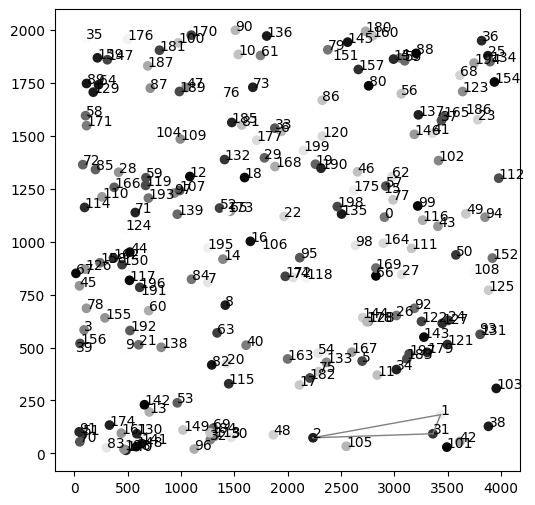

---- [[ 6294.3126075             nan            nan 10490.66468773
   7740.67078104  5330.06613398  7901.45007664  8302.47634522
   7928.12196734  9715.62153062  8979.59982562            inf
   8999.56063672  9232.97963941  8107.45797116  6518.59708179
   7710.97919681  6428.41286751  8120.88388496  7261.43075324
   7803.27365272  9458.27782062  7308.29882043  7497.78442521
   5697.3741888   8114.92685762  5416.08908274  5762.44515597
  10227.99367388  7946.85268214  7719.20301504            inf
   8107.5632693   8005.26484147  5066.69832944 11332.54730957
   8195.3982084   7251.50721923  6020.79448026 10616.5373409
   7465.17662318  7098.17886782  5517.88281213  6311.68080855
   9785.78956557 10636.21784483  6828.51340687  9508.50148412
   6937.92373191  6637.73169275  6229.77754031 10490.16807842
   8368.73742709  8706.93065824  6131.1278716   7712.87832248
   7405.10383053  6573.000208   11008.72111364  9736.14957389
   9317.99828648  8698.7859734   6646.36232858  8020.29313429
  10

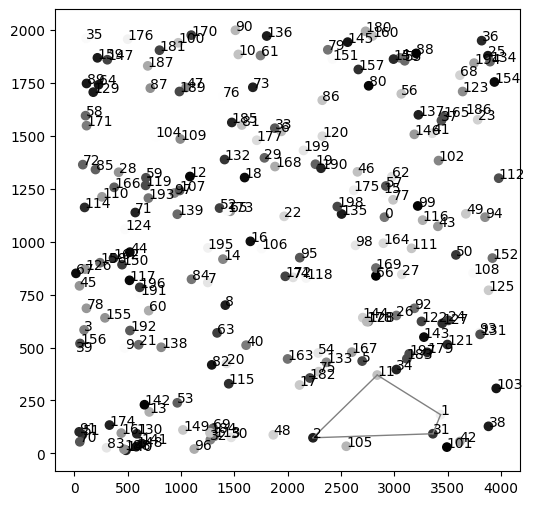

---- [[ 7212.13948502            nan            nan 13827.69386741
   7968.96515272  6952.07850506  9174.33659885 10504.66601697
  10053.39927151 12747.61175748 10601.76613914            inf
  11154.32244338 12231.29117295 10131.32010929  7322.13537601
   9471.89387457  8367.87020127  9791.64483671  8312.64792114
  10094.26070542 12368.34635786  8740.67979073  8504.02038726
   7200.22036258  9167.07147857  6793.39028493  6948.4348517
  13026.73929229  9410.48524382 10231.98838459            inf
  10759.25741546  9332.02559266  6698.94711378 14382.21361007
   9192.96729041  7953.01727526  8135.97029368 14062.11569134
   9564.12486265  7769.42979742  7593.72172623  7370.6320404
  12587.31134381 13935.63480302  7625.80540269 11625.11195804
   9205.79450376  7801.0167925   7490.39584666 14069.35799107
  10311.79204337 11470.00712091  7854.47134269  7985.18264338
   7751.61706124  7343.3119019  14075.04137881 12290.75109006
  12068.79278296 10112.90184613  7368.56499428 10286.09755586
  138

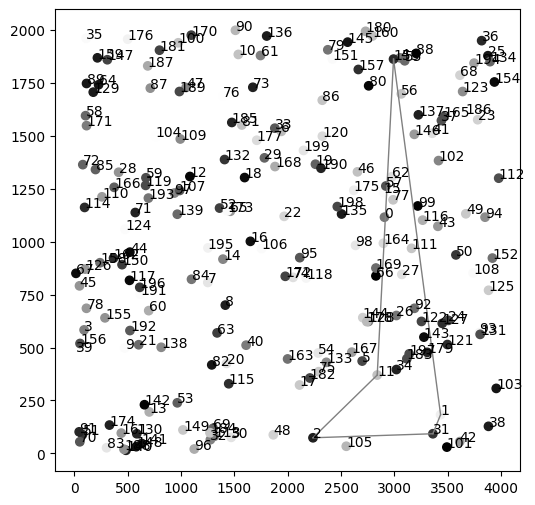

---- [[ 8395.5265488             nan            nan 17686.19298963
   9859.10653238  8372.94829081 11358.59075364 13192.06289505
  12582.73909225 16236.6827218  13321.12590969            inf
  14062.32562965 15554.61701691 12677.86501485  8611.51050579
  11768.43718858 10327.73328792 12202.86387495 10143.19662121
  12658.09353916 15725.58579994 10745.2029977  10391.04982747
   8555.2367894  11345.13750744  7861.98190988            inf
  16593.13677969 11679.00086315 12875.19569643            inf
  13584.40457396 11576.46338639  8018.83426784 18411.96581415
  11393.67618586  9636.31905988 10087.22141876 18003.74546736
  11929.84179185  9361.84749461  9419.51606741  8645.78434605
  16007.47219297 17826.11722646  9132.01539948 14700.02224167
  11496.84545155  9333.69415785  8873.67538245 18025.33014121
  12917.21830079 14528.50044434  9589.82190619  9861.54418568
   9471.63173248  8654.46988727 18001.18231735 15600.70461132
  15315.94599366 12660.99529591  8706.8521406  12907.95045733
  1

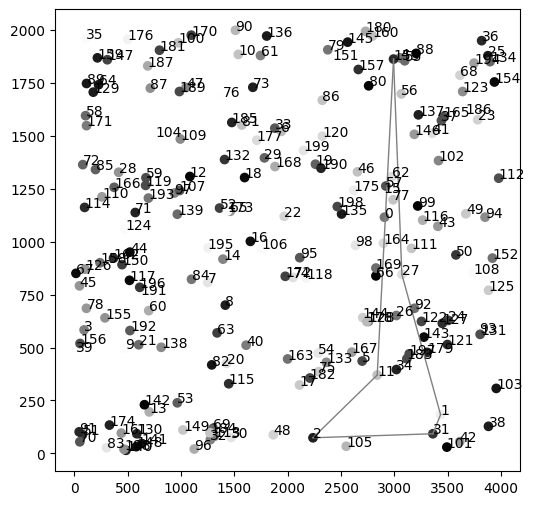

---- [[           inf            nan            nan 21016.00526541
  11089.14830669  9547.38618395 12870.97713279 15340.46189767
  14595.3801094  19212.63694113 15355.70669398            inf
  16360.4030544  18407.4631819  14668.75728348  9191.66557455
  13494.59605338 11914.62241869 13991.13348496 11300.81683429
  14755.03566918 18570.93415749 12149.2115083  11842.71171293
   9791.22772199 13042.64632379  8803.30779436            inf
  19558.13817913 13302.32178507 15112.46668531            inf
  15989.00345059 13150.95156733  9210.50520995 21796.57396999
  13092.10317843 10802.52415812 11938.59087208 21425.49410441
  13824.58460592 10423.77725637 11156.27566765  9612.62626952
  18864.16816196 21167.41752362  9927.38377456 17122.11927706
  13423.88782961 10560.86189826 10030.91704306 21500.51545599
  14927.81618001 17122.93232544 10946.3027183  11087.60979965
  10538.69723472  9266.04359767 21307.8298509  18308.4274106
  18033.51671587 14515.10788128  9374.27534479 15033.23821085
  20

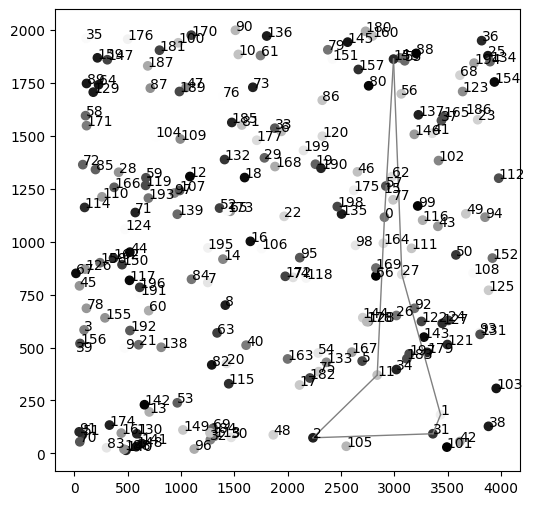

---- [[           inf            nan            nan 24345.05990341
  12810.58982853 10266.53055048 14763.66605408 17540.87132724
  16616.08141992 22158.12857785 17790.77015908            inf
  18868.74089088 21135.47183098 16755.67530063 10304.8764943
  15362.71754102 13228.2357572  16035.97330569 12856.67231961
  16745.17885838 21385.80035671 13781.15895471 13451.63493451
  10520.27550488 14962.05979786  9329.6261542             inf
  22699.82852116 15239.6760534  17100.73502891            inf
  18170.19668894 15099.09840545  9620.98145174 25461.41869152
  15048.72685326 12272.28994664 13067.43705805 24824.68061058
  15632.94298508 11814.07079483 12087.85859966 10602.05066712
  21809.43147588 24555.63658968 11223.52282108 19855.90234052
  15026.34128367 11740.44418548 11003.00334704 24862.51561929
  17122.29684764 19584.9610024  12077.74123076 12793.75203997
  12089.77836718 10404.51482556 24830.83357414 21199.2249712
  20764.13988699 16797.56721251 10544.60918878 17116.41655303
  243

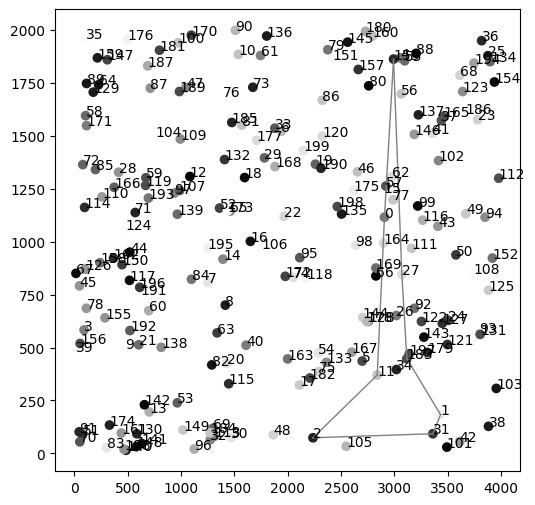

---- [[           inf            nan            nan 27152.92507027
  14711.42772464 12324.26257172            inf 19267.38027828
  18324.74717365 24681.84543639 19068.15194344            inf
  20486.81393429 23683.0997575  18304.81165285 12043.39131731
  16692.24340253 15172.38835303 17178.23243696 13947.23525356
  18689.39099858 23794.60380993 14918.06690437 16028.45631565
  13057.50190575 17666.68361981 11450.05099879            nan
  24971.99279345 16176.1431723  19354.29882407            inf
  20504.96229677 15896.91560054 11914.06264346 28077.36579338
  17709.88053353 14509.15611911 16191.7942938  27744.53872954
  17429.53659848 13964.09941645 15045.97015781 12871.88876933
  24074.56218925 27318.22259279 12697.62836158 21507.58003742
  17195.30397495 14248.63932421 13475.71966451 27947.46391659
  18540.14749016 21929.80136715 13914.48167206 14732.71964751
  13963.61724955 12152.9071484  27402.32506609 23221.98348893
  23002.72393852 17940.23006341 12338.45998091 18976.94087529
  2

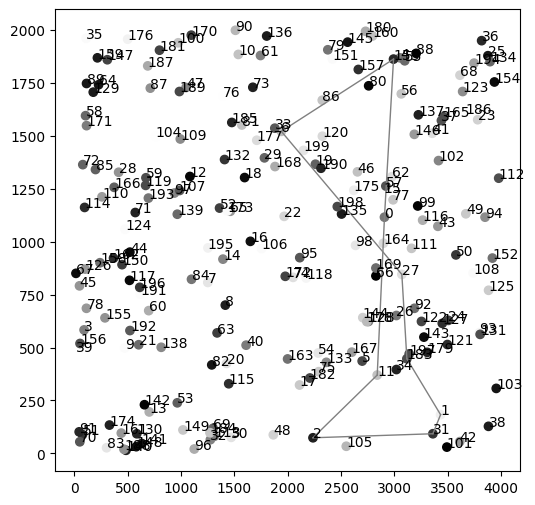

---- [[           inf            nan            nan 29840.58874913
  16031.96541701 13733.33851828            inf 20802.39588962
  19782.03783203 27050.96219189 20339.56354669            inf
  22047.24212472 26012.89979857 19662.71789834 13080.24779014
  17784.59261243 16606.987517   18227.21444571            inf
  20327.37228825 26039.81421136 15682.64369405 17945.8849203
  14887.14999835 19744.80655168 12874.10522002            nan
  27199.38407987 17037.08366965 21248.12586445            inf
  22517.98191652 16696.12178458 13526.93306719 30688.94804125
  19755.38677037 16089.98763354 18613.66022076 30536.52213197
  18884.76350831 15450.78987083 17310.54552151 14438.68959647
  26245.3676566  29985.48406579 13475.26961322 23155.44456414
  18913.99915337 16059.92446021 15242.52037219 30858.89705467
  19844.6712026  24027.87275262 15187.86094039 16083.59167208
  15216.39219178 13202.89592076 29951.45819536 25194.27182757
  25093.6563538  19049.13721016 13439.88336113 20577.01312274
  29

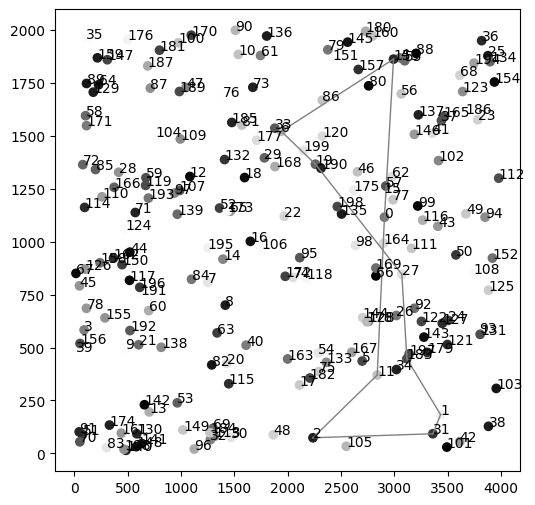

---- [[           inf            nan            nan 33264.94915942
  17456.77509147 15382.42184773            inf 23054.35714497
  21926.55645372 30140.84655734 22341.40154739            inf
  24373.39615918 29024.88739269 21744.31693347 14100.9788572
  19595.81228655 18505.17822725 20040.55890759            inf
  22606.42773343 29002.17847672 17156.02312026 19854.42078884
  16745.46545641 21839.9681091  14399.11106416            nan
  30193.38497313 18666.57780914 23727.03566487            inf
  25143.63340731 18253.03262751 15283.78834616 34063.82380166
  21828.74066822 17668.35450196 21086.32869867 34060.56528801
  20966.05910131 16930.03085282 19659.34914806 15990.28547896
  29167.76171399 33401.43878168            inf 25565.99673789
  21139.57795099 17850.03798055 17000.31297288 34474.61095158
  21903.92961257 26793.05209785 16873.69336355 17524.7585614
  16523.06691478 14232.20414157 33269.19618431 27932.469498
  27912.36030543 20866.06093624 14518.70121116 22851.70256469
  32510

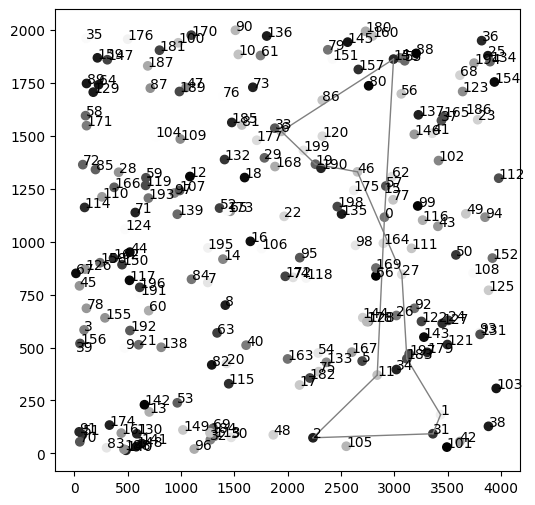

---- [[           inf            nan            nan 36526.69148203
  19121.40475049 17355.07735054            nan 25178.90561643
  23984.22955005 33093.98550762 24066.86379729            inf
  26477.84512352 31952.9667181  23690.05278512 15583.43295325
  21281.45242408 20546.52310615 21643.18861811            inf
  24852.85113141 31833.4938828  18524.64582434 22160.50857769
  19059.72668825 24285.81165588 16341.34687056            nan
  32958.93549397 20067.07486795 26233.42826013            inf
  27767.33721144 19548.64853428 17433.26327869 37173.51343554
  24236.37203493 19634.80521611 24007.58941551 37429.37964056
  23032.01681815 18808.12599406 22440.0739086  18001.6916849
  31901.82480943 36633.37774902            inf 27712.52821613
  23469.7658608  20091.94651414 19219.84642125 37975.99840915
  23773.798978   29493.66214856 18745.43649539 19222.88796332
  18137.61763065 15719.93064563 36339.31431798 30446.04207222
  30584.56232276 22408.00689955 16046.10168216 25054.45457152
  35

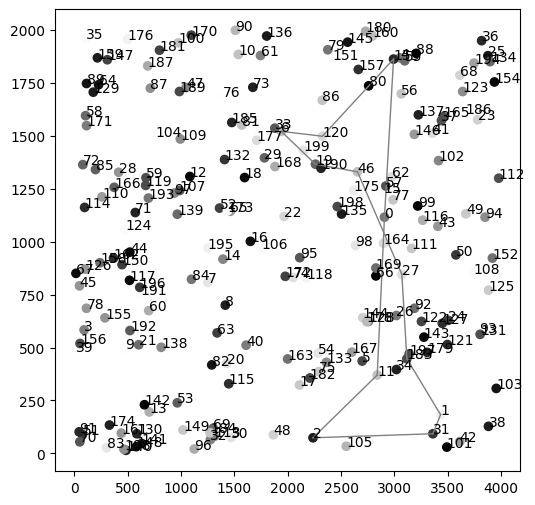

KeyboardInterrupt: 

In [63]:
cur_tour = [(2,1),(1,2)]
non_visited = list(x for x in range(NR_NODES))
non_visited.remove(cur_tour[0][0])
non_visited.remove(cur_tour[0][1])
print(non_visited, cur_tour)
total_cost = cost_list[cur_tour[0][1]] + cost_list[cur_tour[0][0]] + 2 * matrix[cur_tour[0][1]][cur_tour[0][0]]

# plotMap(data, edges=cur_tour, colors = False, cost = False)
# cost_matrix = start_dist_matrix * cost_list.T
for i in range(HALF_NODES):
    start_dist_matrix = create_regret_matrix(non_visited, cur_tour, matrix, cost_list)
    start_dist_for_nodes = np.min(start_dist_matrix, axis = 1)

    
    max_regrets = [-1 for i in range(NR_NODES)]
    for new_node in non_visited:
        #zakładamy że bierzemy najlepszy edge dla danego node
        edge = cur_tour[np.argmin(start_dist_matrix[new_node], axis=0)]

        #if we add new_node in place of edge
        sim_non_visited = deepcopy(non_visited)
        sim_cur_tour = deepcopy(cur_tour)
        sim_cur_tour, cost_diff = add_to_cycle(edge, new_node, matrix, sim_cur_tour, cost_list)
        sim_non_visited.remove(new_node)
        # sim_cur_tour = [(new_node, edge[0]), (edge[1], new_node)]
        sim_regret_matrix = create_regret_matrix(sim_non_visited, sim_cur_tour , matrix, cost_list) #[(new_node, edge[0]), (edge[1], new_node)]
        distances_after_inserting = np.min(sim_regret_matrix, axis = 1) #min distance to every node after we insert node in particular place,
        regret = distances_after_inserting - start_dist_for_nodes

        # print(pd.DataFrame(zip(start_dist_for_nodes,distances_after_inserting, regret)))
        max_regrets[new_node] = np.max(regret) #if we dont add this node some other node will be further by max_regret
    # print(max_regrets)
    added_node = np.argmax(max_regrets)
    edge = cur_tour[np.argmin(start_dist_matrix[added_node], axis=0)]
    
    cur_tour, cost_diff = add_to_cycle(edge, added_node, matrix, cur_tour, cost_list)
    non_visited.remove(added_node)
    total_cost += cost_diff

    # print("---- ",rescued_node, cur_tour, non_visited)
    print("----", total_cost, cur_tour)
    plotMap(data, edges=cur_tour, colors = False, cost=is_cost)
        # print("FINAL", i, total_cost)